In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


** More man died than woman **

In [5]:
titanic.groupby(['Sex'])['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [6]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [7]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [8]:
data = titanic.replace({'Sex':{'male': 0, 'female':1}})

In [9]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [10]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [11]:
avg_age = data['Age'].mean()
data['Age'].fillna(avg_age, inplace=True)
data['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [12]:
lst = data['Cabin'].unique()
cabin_map = dict(zip(lst,range(len(lst))))
cabin_map
data = data.replace({'Cabin':cabin_map})

In [13]:
cabin_map

{nan: 0,
 'C85': 1,
 'C123': 2,
 'E46': 3,
 'G6': 4,
 'C103': 5,
 'D56': 6,
 'A6': 7,
 'C23 C25 C27': 8,
 'B78': 9,
 'D33': 10,
 'B30': 11,
 'C52': 12,
 'B28': 13,
 'C83': 14,
 'F33': 15,
 'F G73': 16,
 'E31': 17,
 'A5': 18,
 'D10 D12': 19,
 'D26': 20,
 'C110': 21,
 'B58 B60': 22,
 'E101': 23,
 'F E69': 24,
 'D47': 25,
 'B86': 26,
 'F2': 27,
 'C2': 28,
 'E33': 29,
 'B19': 30,
 'A7': 31,
 'C49': 32,
 'F4': 33,
 'A32': 34,
 'B4': 35,
 'B80': 36,
 'A31': 37,
 'D36': 38,
 'D15': 39,
 'C93': 40,
 'C78': 41,
 'D35': 42,
 'C87': 43,
 'B77': 44,
 'E67': 45,
 'B94': 46,
 'C125': 47,
 'C99': 48,
 'C118': 49,
 'D7': 50,
 'A19': 51,
 'B49': 52,
 'D': 53,
 'C22 C26': 54,
 'C106': 55,
 'C65': 56,
 'E36': 57,
 'C54': 58,
 'B57 B59 B63 B66': 59,
 'C7': 60,
 'E34': 61,
 'C32': 62,
 'B18': 63,
 'C124': 64,
 'C91': 65,
 'E40': 66,
 'T': 67,
 'C128': 68,
 'D37': 69,
 'B35': 70,
 'E50': 71,
 'C82': 72,
 'B96 B98': 73,
 'E10': 74,
 'E44': 75,
 'A34': 76,
 'C104': 77,
 'C111': 78,
 'C92': 79,
 'E38': 80,
 'D

In [14]:
titanic[titanic['Cabin'] == 'B57 B59 B63 B66']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


In [15]:
lst = data['Embarked'].unique()
embarked_map = dict(zip(lst,range(len(lst))))
data = data.replace({'Embarked':embarked_map})

In [16]:
embarked_map

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


Training model

In [18]:
y = data['Survived']
X = data[['Pclass', 'Sex', 'Age', 'Cabin', 'SibSp', 'Parch', 'Embarked']]

Splitting data for testing

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print(X_train.shape, X_test.shape)

(712, 7) (179, 7)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
predictions = model.predict(X_test)
predictions

array([ 0.3813932 ,  1.10317021,  0.58064587,  0.38040665,  0.23917088,
        0.01457925,  0.55386455,  0.13184583,  0.99142834,  0.60927184,
        0.23917088,  0.07321254,  0.67009009,  0.12011918,  0.23575876,
        0.00287355,  0.63672491,  0.16116248,  0.1208369 ,  0.72727361,
        0.05562256,  0.03128228,  0.64779798,  0.60927184, -0.01473739,
        0.21397434,  0.16702581,  0.23887742,  0.12219286,  0.01748194,
        0.77743696,  0.52555018,  0.64779798,  0.07321254,  0.14020712,
        1.06170537,  0.0849392 ,  0.0028526 ,  0.15193377,  0.52858921,
        0.60243713,  0.60927184,  0.83654521,  0.31258353,  0.18463675,
        0.46245139,  0.01961359,  0.42166264,  0.04975923,  0.23917088,
        0.74273195,  0.39967727,  0.6954398 ,  0.64228433,  0.64779798,
        0.08670337,  0.16597936,  0.16116248,  0.31147397,  0.89166091,
        0.92713252,  0.13773011, -0.03819071,  0.6070834 ,  0.02044258,
        0.27258668,  0.79850131,  0.51008923,  0.5946974 ,  0.39

/Users/khuyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


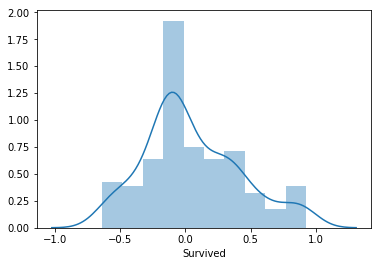

In [22]:
sns.distplot(y_test - predictions)

In [23]:
#'Pclass', 'Sex', 'Age', 'Cabin', 'SibSp', 'Parch', 'Embarked'
vals = np.array([1, 1, 48, 141, 0, 0, 0]).reshape(1, -1)
model.predict(vals)

array([0.95870065])